In [1]:
import matplotlib.pyplot as plt
plt.style.use("classic")
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

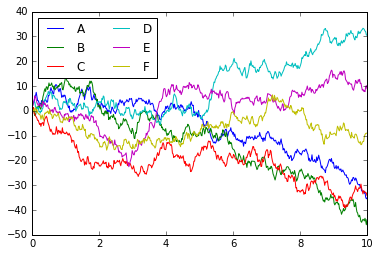

In [4]:
plt.plot(x, y)
plt.legend("ABCDEF", ncol=2, loc="upper left")

In [9]:
import seaborn as sns
sns.set()


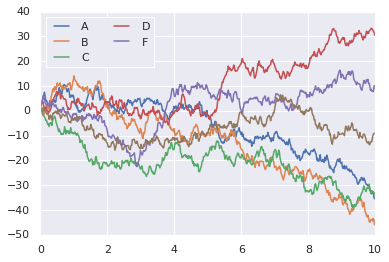

In [10]:
plt.plot(x, y)
plt.legend("ABCDF", ncol=2, loc="upper left")

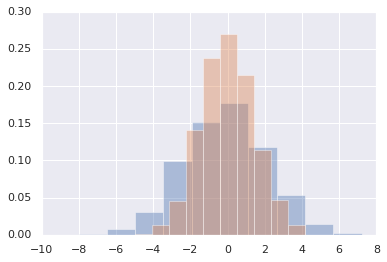

In [16]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=["x", "y"])

for col in "xy":
    plt.hist(data[col], density=1, alpha=0.4)


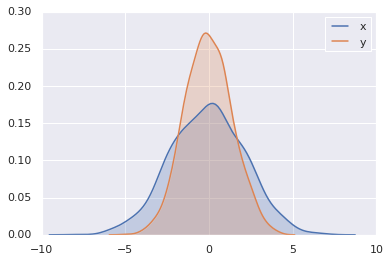

In [19]:
for col in "xy":
    sns.kdeplot(data[col], shade=True)

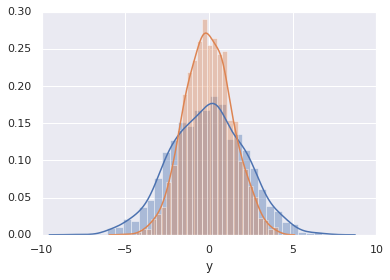

In [21]:
sns.distplot(data["x"])
sns.distplot(data["y"])

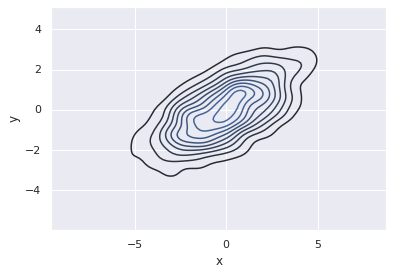

In [23]:
#2d kde plot
sns.kdeplot(data["x"], data["y"])

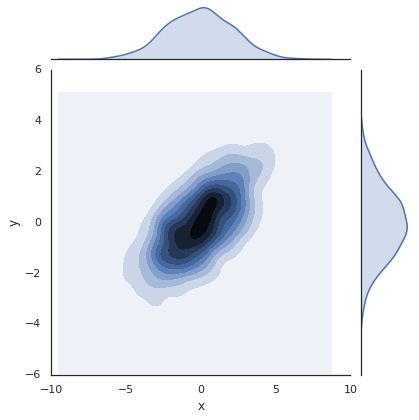

In [24]:
with sns.axes_style("white"):
    sns.jointplot("x", "y", data, kind="kde")
    

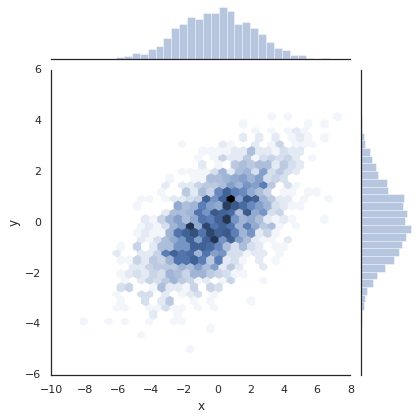

In [25]:
with sns.axes_style("white"):
    sns.jointplot("x", "y", data, kind="hex")


In [26]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/jose/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


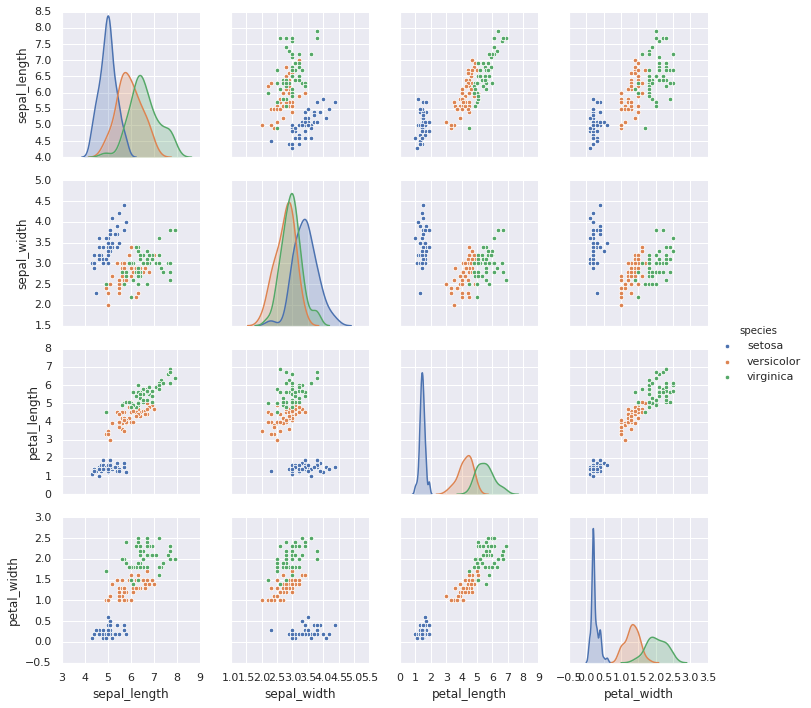

In [27]:
sns.pairplot(iris, hue="species", size=2.5)

In [28]:
#Tips

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


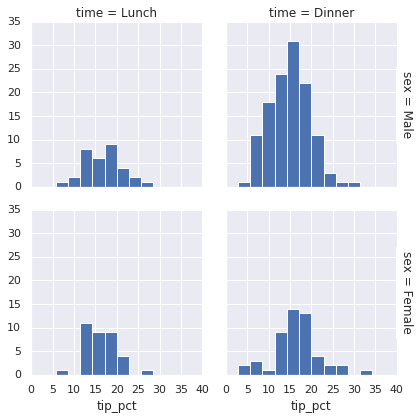

In [29]:
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

/home/jose/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


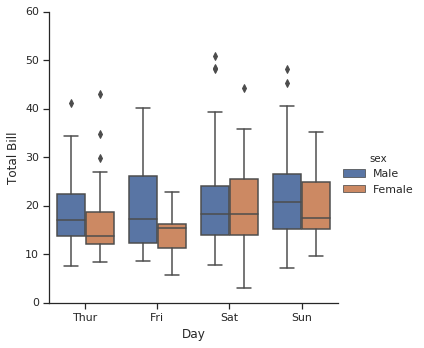

In [30]:
with sns.axes_style(style="ticks"):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

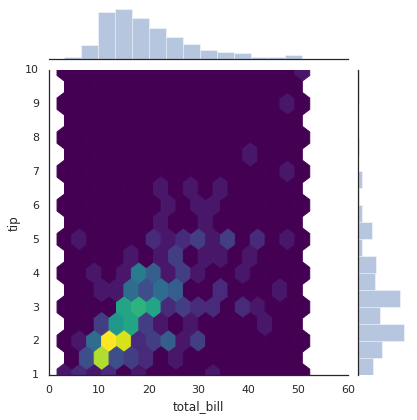

In [32]:
with sns.axes_style(style="white"):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex", cmap="viridis")

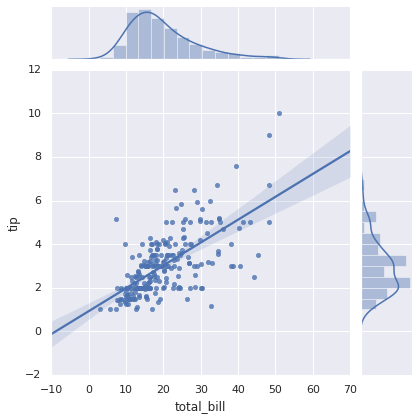

In [33]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

In [34]:
# and now planets
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/home/jose/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


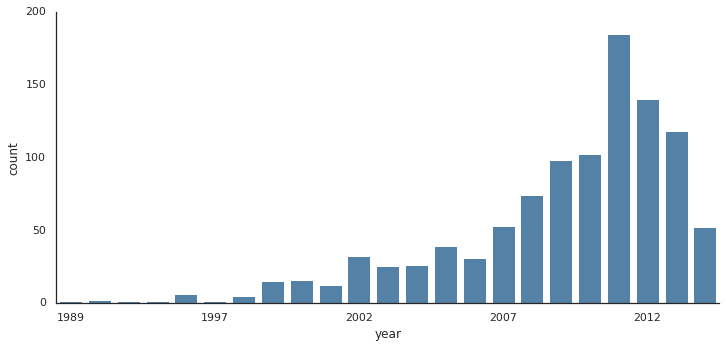

In [36]:
with sns.axes_style(style="white"):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color="steelblue")
    g.set_xticklabels(step=5)

/home/jose/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


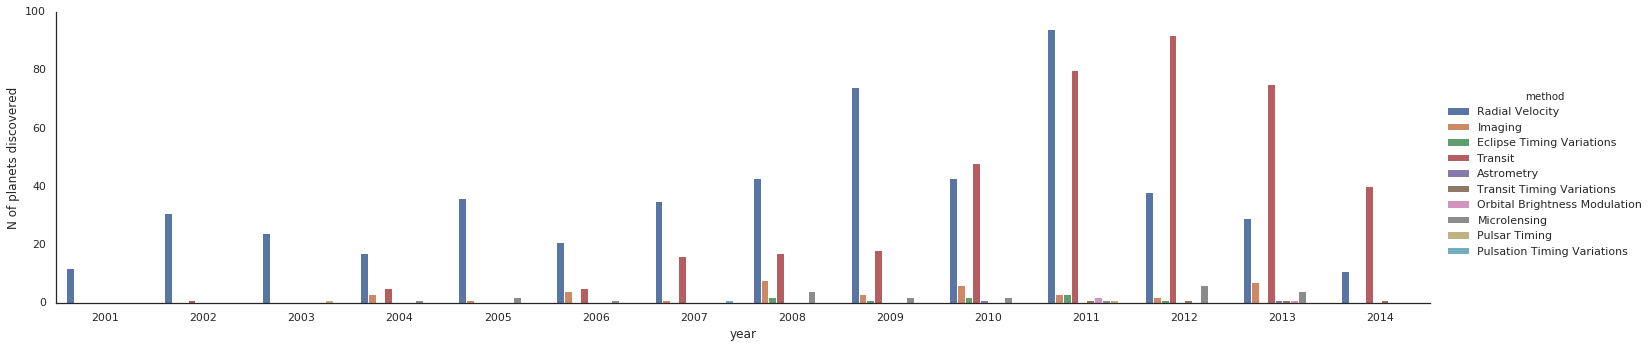

In [37]:
with sns.axes_style(style="white"):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind="count", hue="method", order=range(2001, 2015))
    g.set_ylabels("N of planets discovered")